In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import adaptive_latents as al
# from nlb_tools.nwb_interface import NWBDataset
from pynwb import NWBHDF5IO
import pandas as pd


rng = np.random.default_rng()

In [19]:
ls /home/jgould/Documents/Bubblewrap/generated/datasets/000128/sub-Jenkins/

sub-Jenkins_ses-full_desc-test_ecephys.nwb
sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb


In [18]:
fpath

PosixPath('/home/jgould/Documents/Bubblewrap/generated/datasets/000128/sub-Jenkins/sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb')

In [2]:
fpath = al.CONFIG["data_path"] / '000128'/ 'sub-Jenkins'/ 'sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb'

nwb_in = NWBHDF5IO(fpath, "r").read()
nwb_in

root pynwb.file.NWBFile at 0x139997579683952
Fields:
  devices: {
    electrode_array_M1 <class 'pynwb.device.Device'>,
    electrode_array_PMd <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    electrode_group_M1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    electrode_group_PMd <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: Center-out delayed reaching task with maze barriers
  experimenter: ['Mark M. Churchland' 'Matthew T. Kaufman']
  file_create_date: [datetime.datetime(2021, 9, 2, 0, 31, 43, 28866, tzinfo=tzoffset(None, -14400))]
  identifier: ac9fe3ee-0ba6-11ec-93c2-ab1d5afd05f0
  institution: Stanford University
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (5,), type "|O">
  lab: Shenoy
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://doi.org/10.1016/j.neuron.2010.09.015']
  session_description: Data from monkey Jenkins performing center-out delayed reaching task. This file contains trials from the full session on 2009-09-25 that can be used for training models for the Neural Latents Benchmark.
  session_id: full
  session_start_time: 2009-09-25 00:00:00-07:00
  subject: subject pynwb.file.Subject at 0x139997579845824
Fields:
  sex: M
  species: Macaca mulatta
  subject_id: Jenkins

  timestamps_reference_time: 2009-09-25 00:00:00-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

In [3]:
trials = nwb_in.intervals['trials'].to_dataframe()
trial_types = trials["trial_type"].unique()

In [4]:
hand_pos = np.array(nwb_in.processing['behavior'].data_interfaces['hand_pos'].data)
hand_t = np.array(nwb_in.processing['behavior'].data_interfaces['hand_pos'].timestamps)

In [5]:
selected_set = trials[(trials.trial_type == trial_types[0]) & (trials.trial_version == 0)]

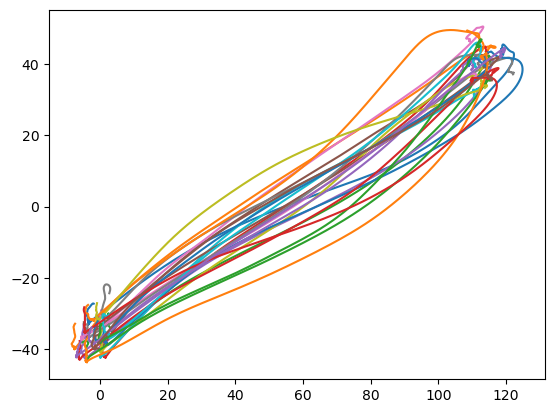

In [6]:
to_plot = []
for index, row in selected_set.iterrows():
    to_plot.append(hand_pos[(row.start_time < hand_t) & (hand_t < row.stop_time),:])
for reach in to_plot:
    plt.plot(reach[:,0], reach[:,1])

In [7]:
units = nwb_in.units.to_dataframe()

In [8]:
units

,heldout,spike_times,obs_intervals,electrodes
id,,,,
1011,False,"[1.808667, 1.825733, 5.076933, 7.682567, 7.777...","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...
1021,True,"[0.024867, 2.344267, 2.383733, 2.533133, 2.607...","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...
1022,True,"[2.241433, 2.429, 2.492767, 2.7691, 5.1038, 5....","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...
1031,False,"[1.569233, 1.640567, 2.086533, 2.1537, 17.4253...","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...
1032,False,"[0.912867, 1.321867, 1.391733, 1.554333, 1.686...","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...
...,...,...,...,...
2911,False,"[1.685367, 1.8962, 1.942, 2.111467, 3.0279, 5....","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...
2931,False,"[0.001833, 0.7705, 0.921267, 0.9761, 0.988967,...","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...
2941,True,"[0.101167, 0.6676, 1.0085, 1.0817, 1.101933, 2...","[[0.0, 3.321], [3.4, 6.521], [6.6, 9.856], [9....",x y z imp location filtering \ id ...


In [9]:
bin_width = 0.03
bin_edges = np.arange(units.iloc[0,2][0,0], units.iloc[0,2][-1,-1] + bin_width, bin_width)

A = np.zeros((len(bin_edges)-1, units.shape[0]))

for i in range(units.shape[0]):
    A[:,i], _ = np.histogram(units.iloc[i,1], bin_edges)

recorded_intervals = units.iloc[0,2]

covers = []

interval_to_start_from = 0
# set_trace()

def intersection(start1, stop1, start2, stop2):
    return max(min(stop1, stop2) - max(start1, start2),0)

for i in range(len(bin_edges)-1):
    bin_start = bin_edges[i]
    bin_stop = bin_edges[i+1]
    covered = 0
    for j in range(interval_to_start_from, recorded_intervals.shape[0]):
        interval_start, interval_stop = recorded_intervals[j]
        if bin_start > interval_stop:
            interval_to_start_from += 1
            continue
        if interval_start > bin_stop:
            break
        covered +=  intersection(bin_start, bin_stop, interval_start, interval_stop)
        
    if covered/bin_width < .9:
        A[i,:] = np.nan

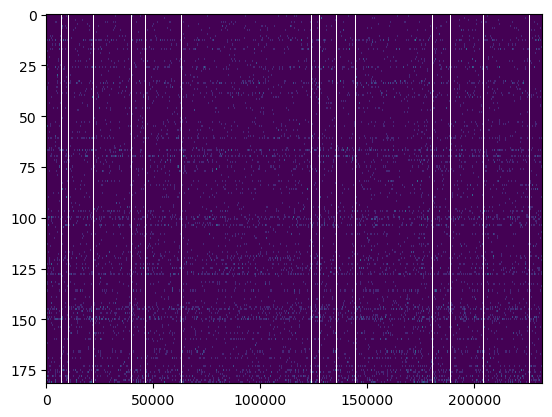

In [10]:
plt.imshow(A.T, aspect='auto', interpolation='nearest')

In [11]:
hand_pos.shape

(6809920, 2)

In [12]:
import adaptive_latents

In [13]:

bin_centers = np.convolve(bin_edges,[.5, .5],'valid')
resampled_hand = adaptive_latents.input_sources.functional.resample_behavior(hand_pos, bin_centers, hand_t)

In [14]:
np.column_stack([A, resampled_hand])

array([[   0.        ,    1.        ,    0.        , ...,    1.        ,
          -0.74973033,  -39.97433134],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
          -0.5068591 ,  -38.61514553],
       [   0.        ,    0.        ,    0.        , ...,    1.        ,
          -0.9626531 ,  -37.76805963],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -114.36942533, -114.81377245],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -114.37166871, -114.69303613],
       [          nan,           nan,           nan, ...,           nan,
        -114.33324169, -114.81002897]])

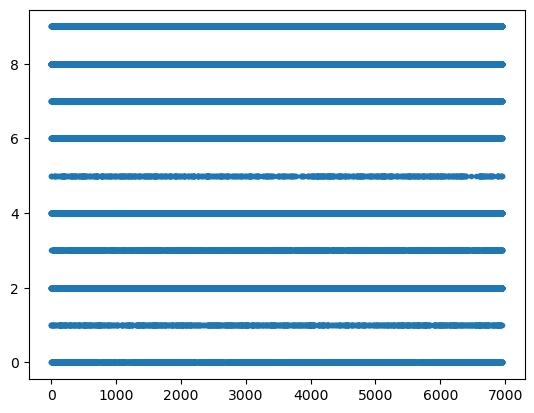

In [17]:
%matplotlib inline
for i in range(10):
    times = units[~units.heldout].iloc[i,1]
    plt.plot(times, times*0+i, '.', color='C0')
    # for times in units[~units.heldout].iloc[i,2]:
    #     plt.plot(times, times*0+i, '-', color='red', alpha=.1)

In [ ]:
nwbfile

In [ ]:
trials

In [ ]:
ls /home/jgould/Documents/Bubblewrap/generated/datasets/000128/sub-Jenkins/sub-Jenkins_ses-full_desc-train_behavior+ecephys.nwb